#1

### Set up data and create a object of class ProjectCollection

In [1]:
import kickass as ks
import matplotlib.pyplot as plt

import json
fd = open("../data/project_successful_final_tech_sample.json", "r")

project_json = json.load(fd)

ks_projects = ks.ProjectCollection(project_json, "../data/stopwords.txt")

### Visualize the singular values and variances to judge a suitable cut off

In [2]:
doc_id, D, s, T = ks_projects.lsa(1)

In [3]:
#variance explained 
var = ks.np.cumsum(s ** 2) / sum(s ** 2)

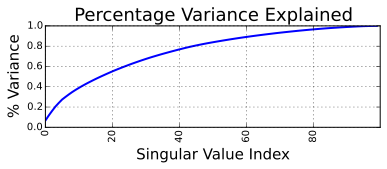

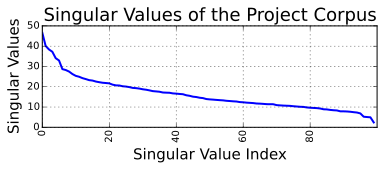

In [4]:
plt.subplot(211)
plt.plot(var, linewidth=2.0)
plt.ylabel('% Variance', fontsize = 15)
plt.xlabel('Singular Value Index', fontsize = 15)
plt.title('Percentage Variance Explained', fontsize = 18)
x = range(0, len(var), 20)
plt.xticks(x, rotation='vertical')
plt.grid(True)
plt.show()

plt.subplot(212)
plt.plot(s, linewidth=2.0)
plt.ylabel('Singular Values', fontsize = 15)
plt.xlabel('Singular Value Index', fontsize = 15)
plt.title('Singular Values of the Project Corpus', fontsize = 18)
x = range(0, len(var), 20)
plt.xticks(x, rotation='vertical')
plt.grid(True)
plt.show()

Lets pick cutoff atf 80% variance explained. We can choose the cutoff parameter of our function that returns a document term matrix to be either .8 or roughly the top 50 singulay values from the variance explained plot.

### Calculate a document term matrix based on LSA and without LSA

In [8]:
doc_id, doc_term_mat_LSA = ks_projects.latent_doc_term_mat(.8)
doc_id1, doc_term_mat = ks_projects.doc_term_mat()

In [9]:
#Confirm if the two doc_term matrices have the same document order
len(doc_id1) == sum([doc_id[i] == doc_id1[i] for i in range(len(doc_id1))])

True

### Calculate Cosine similarity of both Doc Term Matrices

In [10]:
doc_term_cosine = ks_projects.cosine_sim(doc_term_mat).round(3)
doc_term_cosine_LSA = ks_projects.cosine_sim(doc_term_mat_LSA).round(3)

### Compare documents pre and post LSA to see the differences in document similarity

Cosine similarity of documents using a document term matrix may suffer from the following problems:

1. The matrix may be too <b>noisy</b> i.e components which do not contribute in "defining" a document.
2. The matrix lists only the words actually in each document, whereas we might be interested in all words related to each document—generally a much larger set due to <b>synonymy</b>.
3. The matrix also suffers from <b>polysemy</b> i.e each word may have different meanings

Thus we expect the cosine similarity over such a matrix to be less representative of the <b>true</b> similarity between documents. 

Thus we estimate a <b>lower ranked approximation</b> of the document term matrix which we hope will mitigate the above stated problems and return a much better representation of cosine similarity between documents. 

#### Cosine Similarity : Document Term Matrix without LSA

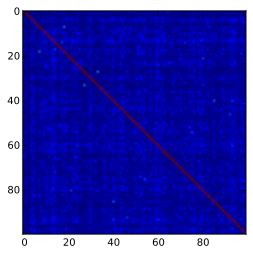

In [11]:
plt.imshow(doc_term_cosine)


#### Cosine Similarity : Document Term Matrix with LSA

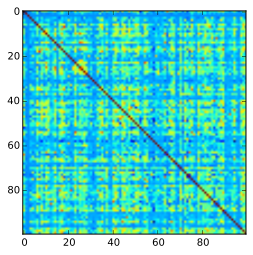

In [12]:
plt.imshow(doc_term_cosine_LSA)